# Admission numbers vs Key Indicators

__NOTE__: Welsh LSOAs and so stroke units have zero admissions.

In [1]:
import os
import pandas as pd
import numpy as np  # for NaN
import statsmodels.api as sm

In [2]:
from scipy.stats import pearsonr

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

### Import data

In [6]:
dir_files = '../data/organisational_audit/processed'
file_excel = 'processed_2019_portfolio_key_indicators_summary_numeric_shap.csv'

In [7]:
df = pd.read_csv(os.path.join(dir_files, file_excel))

In [8]:
df.columns

Index(['Hospital names', 'acute_unit', 'bed1', 'bed3', 'ki_total', 'ki1',
       'ki1_nurses6_wte', 'ki1_nurses7_wte', 'ki2', 'ki2_psych_wte', 'ki3',
       'ki3_strokenurse_outofhours', 'ki4',
       'ki4_minimum_nurse_bed1_saturdays10am',
       'ki4_minimum_nurse_bed1_sundays10am',
       'ki4_minimum_nurse_bed3_saturdays10am',
       'ki4_minimum_nurse_bed3_sundays10am', 'ki5',
       'ki5_occupationaltherapy_7days', 'ki5_physiotherapy_7days',
       'ki5_speechlanguagetherapy_7days', 'ki6', 'ki6_prealert_consultant',
       'ki6_prealert_fastpositive_sometimes', 'ki6_prealert_fastpositive_yes',
       'ki6_prealert_ivtcandidates_sometimes',
       'ki6_prealert_ivtcandidates_yes', 'ki6_prealert_juniordoctor',
       'ki6_prealert_othersuspectedstroke_sometimes',
       'ki6_prealert_othersuspectedstroke_yes', 'ki6_prealert_strokenurse',
       'ki7', 'ki7_percent_access_to_stroke_esd_team', 'ki7_stroke_esd_team',
       'ki8', 'ki8_patientcarersurvey_frequency_1to2peryear',
      

In [9]:
df['team_samuel']

0                 Queens Hospital Romford HASU
1                   Royal London Hospital HASU
2                  Charing Cross Hospital HASU
3                 King's College Hospital HASU
4      Princess Royal University Hospital HASU
                        ...                   
111                         West Wales General
112                 Withybush General Hospital
113                     Prince Philip Hospital
114                         Bronglais Hospital
115                         Morriston Hospital
Name: team_samuel, Length: 116, dtype: object

In [10]:
dir_files = '../data_samuel2'
file_excel = 'admissions_2017-2019.csv'

In [11]:
df_admissions = pd.read_csv(os.path.join(dir_files, file_excel))

In [12]:
df_admissions.columns

Index(['area', 'admissions'], dtype='object')

In [13]:
df_admissions

,area,admissions
0,Welwyn Hatfield 010F,0.666667
1,Welwyn Hatfield 012A,4.000000
2,Welwyn Hatfield 002F,2.000000
3,Welwyn Hatfield 002E,0.666667
4,Welwyn Hatfield 010A,3.333333
...,...,...
34747,Cardiff 006F,0.000000
34748,Swansea 025F,0.000000
34749,Swansea 023E,0.000000
34750,Swansea 025G,0.000000


In [14]:
dir_files = '../data_samuel2'
file_excel = 'lsoa_travel_time_matrix_calibrated.csv'

In [15]:
df_times = pd.read_csv(os.path.join(dir_files, file_excel), index_col=0)

In [16]:
df_times.columns

Index(['B152TH', 'B714HJ', 'B95SS', 'BA13NG', 'BA214AT', 'BB23HH', 'BD96RJ',
       'BH77DW', 'BL97TD', 'BN112DH',
       ...
       'TN240LZ', 'TQ27AA', 'TR13LQ', 'TS198PE', 'TS43BW', 'WD180HB', 'WF14DG',
       'WR51DD', 'WV100QP', 'YO318HE'],
      dtype='object', length=125)

In [17]:
df_times.head(3)

,B152TH,B714HJ,B95SS,BA13NG,BA214AT,BB23HH,BD96RJ,BH77DW,BL97TD,BN112DH,...,TN240LZ,TQ27AA,TR13LQ,TS198PE,TS43BW,WD180HB,WF14DG,WR51DD,WV100QP,YO318HE
LSOA,,,,,,,,,,,,,,,,,,,,,
Adur 001A,173.3,179.8,171.2,161.5,152.9,274.3,261.4,100.3,262.5,18.7,...,89.6,212.0,291.5,310.8,306.5,92.8,242.1,178.7,186.2,267.9
Adur 001B,173.3,179.8,172.3,161.5,152.9,274.3,261.4,99.2,263.6,18.7,...,90.6,212.0,290.4,311.9,306.5,92.8,242.1,178.7,186.2,267.9
Adur 001C,173.3,180.9,172.3,150.8,151.9,274.3,261.4,98.2,263.6,17.6,...,90.6,210.9,289.3,311.9,307.6,93.9,243.2,178.7,187.3,268.9


In [18]:
dir_files = '../data_samuel2'
file_excel = 'stroke_units_regions.csv'

In [19]:
df_unit_names = pd.read_csv(os.path.join(dir_files, file_excel))

In [20]:
df_unit_names.columns

Index(['postcode', 'stroke_team', 'short_code', 'ssnap_name', 'use_ivt',
       'use_mt', 'use_msu', 'transfer_unit_postcode', 'lsoa', 'lsoa_code',
       'region', 'region_code', 'region_type', 'country', 'icb', 'icb_code',
       'isdn'],
      dtype='object')

In [21]:
df_unit_names.head(3)

,postcode,stroke_team,short_code,ssnap_name,use_ivt,use_mt,use_msu,transfer_unit_postcode,lsoa,lsoa_code,region,region_code,region_type,country,icb,icb_code,isdn
0,SY231ER,Bronglais Hospital (Aberystwyth),AB,Bronglais Hospital,1,0,0,nearest,Ceredigion 002A,W01000512,Hywel Dda University Health Board,W11000025,LHB,Wales,NaN,NaN,NaN
1,CB20QQ,"Addenbrooke's Hospital, Cambridge",AD,Addenbrooke's Hospital,1,1,1,nearest,Cambridge 013D,E01017995,NHS Cambridgeshire and Peterborough ICB - 06H,E38000260,SICBL,England,NHS Cambridgeshire and Peterborough Integrated...,E54000056,East of England (South)
2,L97AL,"University Hospital Aintree, Liverpool",AI,University Hospital Aintree,1,1,1,nearest,Liverpool 005A,E01006654,NHS Cheshire and Merseyside ICB - 99A,E38000101,SICBL,England,NHS Cheshire and Merseyside Integrated Care Board,E54000008,Cheshire and Merseyside


## Assign stroke units to LSOA

Just pick the unit that's shortest in time.

In [22]:
series_nearest = df_times.idxmin(axis='columns')
series_nearest.name = 'nearest_unit'

In [23]:
# Add the nearest unit data into the admissions dataframe:
df_admissions = pd.merge(df_admissions, series_nearest, left_on='area', right_index=True, how='left')

In [24]:
# Groupby unit name and take the sum:
series_admissions = df_admissions.groupby('nearest_unit').sum()

/tmp/ipykernel_11289/2905123536.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  series_admissions = df_admissions.groupby('nearest_unit').sum()


In [25]:
series_admissions

,admissions
nearest_unit,
B152TH,696.333333
B714HJ,873.666667
B95SS,1152.000000
BA13NG,638.666667
BA214AT,499.000000
...,...
WD180HB,761.666667
WF14DG,608.333333
WR51DD,584.333333


In [26]:
# Link postcodes to names
df_units_admissions = pd.merge(df_unit_names[['postcode', 'ssnap_name']], series_admissions, left_on='postcode', right_index=True, how='right')

In [27]:
df_units_admissions.head(3)

,postcode,ssnap_name,admissions
91,B152TH,Queen Elizabeth Hospital Edgbaston,696.333333
117,B714HJ,Sandwell District Hospital,873.666667
10,B95SS,Birmingham Heartlands Hospital,1152.000000


In [28]:
len(df_units_admissions)

125

### Remove Wales

Because all admissions data are zero.

In [29]:
df_units_admissions = df_units_admissions.loc[df_units_admissions['admissions'] != 0]

In [30]:
len(df_units_admissions)

114

### Merge in admissions

In [31]:
# Merge in admissions numbers to main dataframe:
df = pd.merge(df, df_units_admissions, left_on='team_samuel', right_on='ssnap_name', how='left')

In [32]:
df.columns

Index(['Hospital names', 'acute_unit', 'bed1', 'bed3', 'ki_total', 'ki1',
       'ki1_nurses6_wte', 'ki1_nurses7_wte', 'ki2', 'ki2_psych_wte', 'ki3',
       'ki3_strokenurse_outofhours', 'ki4',
       'ki4_minimum_nurse_bed1_saturdays10am',
       'ki4_minimum_nurse_bed1_sundays10am',
       'ki4_minimum_nurse_bed3_saturdays10am',
       'ki4_minimum_nurse_bed3_sundays10am', 'ki5',
       'ki5_occupationaltherapy_7days', 'ki5_physiotherapy_7days',
       'ki5_speechlanguagetherapy_7days', 'ki6', 'ki6_prealert_consultant',
       'ki6_prealert_fastpositive_sometimes', 'ki6_prealert_fastpositive_yes',
       'ki6_prealert_ivtcandidates_sometimes',
       'ki6_prealert_ivtcandidates_yes', 'ki6_prealert_juniordoctor',
       'ki6_prealert_othersuspectedstroke_sometimes',
       'ki6_prealert_othersuspectedstroke_yes', 'ki6_prealert_strokenurse',
       'ki7', 'ki7_percent_access_to_stroke_esd_team', 'ki7_stroke_esd_team',
       'ki8', 'ki8_patientcarersurvey_frequency_1to2peryear',
      

## Stats

### Admissions distributions

In [33]:
admissions = df['admissions'].copy().dropna().values

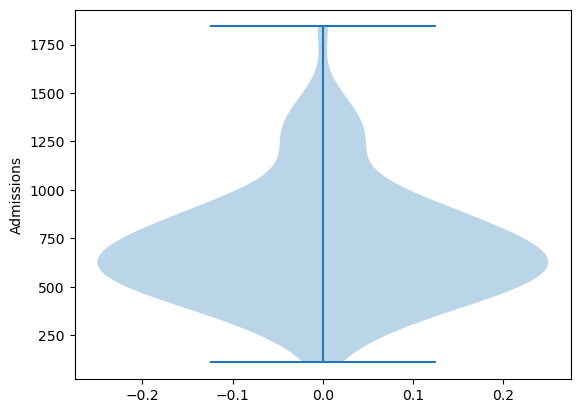

In [34]:
fig, ax = plt.subplots()

ax.violinplot(admissions, positions=[0])

ax.set_ylabel('Admissions')

plt.show()

### Admissions vs SHAP vs Key Indicators

In [35]:
x = df['ki_total'].values

In [36]:
y = df['shap_mean'].values

In [37]:
c = df['admissions'].values

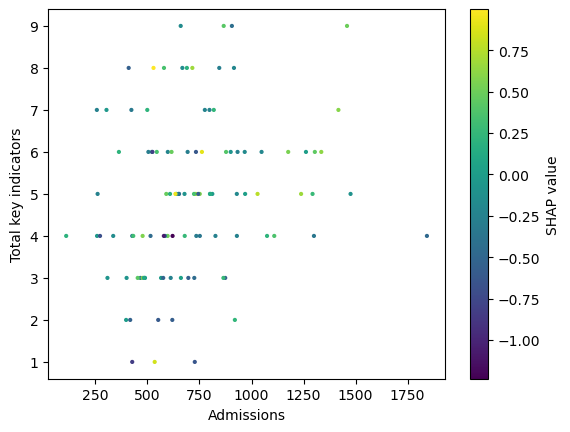

In [38]:
fig, ax = plt.subplots()

dog = ax.scatter(c, x, c=y, s=4)
plt.colorbar(dog, label='SHAP value')

ax.set_ylabel('Total key indicators')
ax.set_xlabel('Admissions')

plt.show()

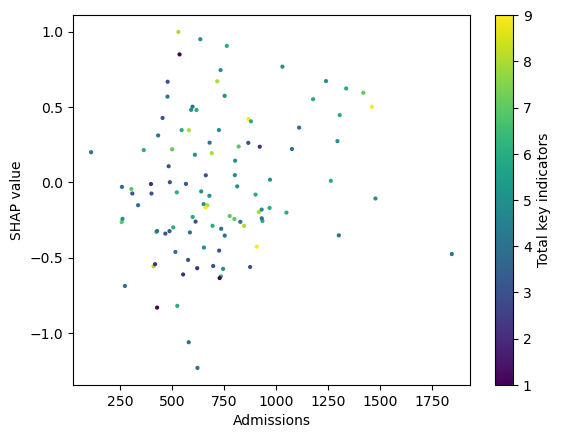

In [39]:
fig, ax = plt.subplots()

dog = ax.scatter(c, y, c=x, s=4)
plt.colorbar(dog, label='Total key indicators')

ax.set_ylabel('SHAP value')
ax.set_xlabel('Admissions')

plt.show()

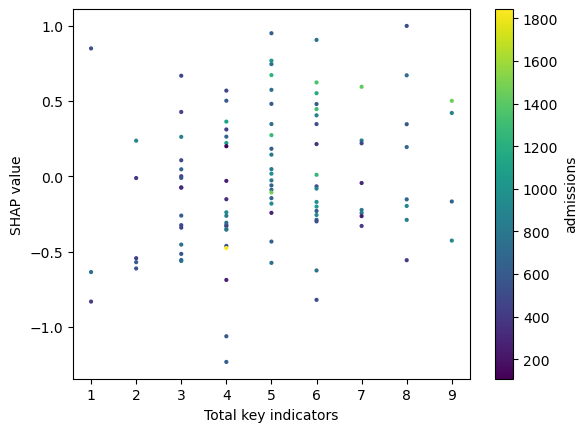

In [40]:
fig, ax = plt.subplots()

dog = ax.scatter(x, y, c=c, s=4)
plt.colorbar(dog, label='admissions')

ax.set_xlabel('Total key indicators')
ax.set_ylabel('SHAP value')

plt.show()